In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1)

In [2]:
keywords = pd.read_csv('keywords_preprocessed.csv')
meta = pd.read_csv('movies_metadata_preprocessed.csv')
ratings = pd.read_csv('ratings_preprocessed.csv')

In [3]:
#random_state in the train test split has been set to 1 to recreate results, remove it to review model
df_numeric = meta[['budget','popularity','revenue','runtime','vote_average','vote_count']]
df_numeric.dropna(inplace=True)
#new feature "new" has been engineered to be able to use the votes provided by viewers while trying to 
#give importance to number of voters
factors = [i for i in np.arange(0.1,1.0,0.1)]
for factor in factors:
    df_numeric['new'+str(factor)] = df_numeric['vote_average']*np.power(df_numeric['vote_count'],factor)

train,test = train_test_split(df_numeric,test_size=0.25,random_state = 1)

/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
x = train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = df_numeric.columns

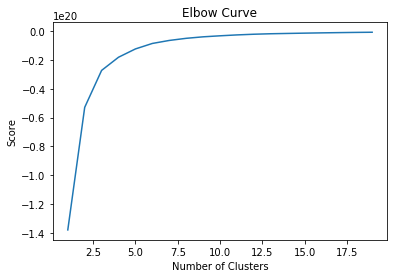

In [5]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
y = np.array(train.revenue).reshape(-1,1)
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
#we look at the graph and not that elbow is at 4 and hence we choose 4 as cluster number
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit(y).predict(y)
train['cluster'] = kmeans.labels_


/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
print('Size of clusters : ',[len(train[train.cluster==i]) for i in range(4)])

Size of clusters :  [31389, 297, 1239, 75]


In [8]:
train.groupby(['cluster']).mean()

,budget,popularity,revenue,runtime,vote_average,vote_count,new0.1,new0.2,new0.30000000000000004,new0.4,new0.5,new0.6,new0.7000000000000001,new0.8,new0.9
cluster,,,,,,,,,,,,,,,
0,5.436076e+06,2.463697,9.077832e+06,93.624837,5.605543,46.697824,7.327419,9.835222,13.579166,19.312879,28.323780,42.854944,66.889489,107.630388,178.331532
1,9.215676e+07,16.518574,3.809150e+08,117.579125,6.583165,2504.171717,14.140495,30.540037,66.299506,144.633175,316.985319,697.802461,1542.642977,3424.224414,7630.489636
2,4.347351e+07,10.959109,1.243770e+08,119.979822,6.325827,883.648103,11.848542,22.578831,43.653587,85.451821,169.097484,337.883404,681.130428,1384.308291,2834.919033
3,1.621867e+08,50.661106,9.431160e+08,132.893333,6.982667,5598.280000,16.451646,38.835947,91.851955,217.653442,516.722224,1229.006836,2928.514737,6990.790071,16717.835376


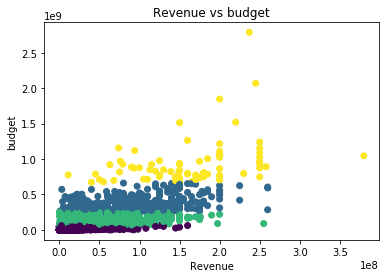

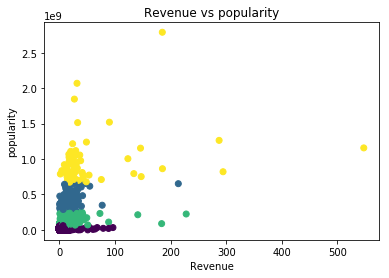

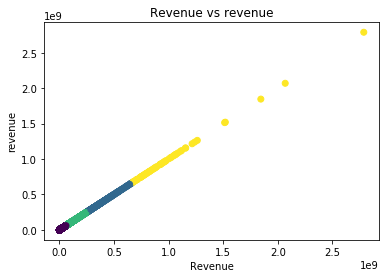

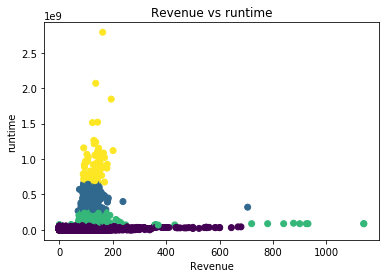

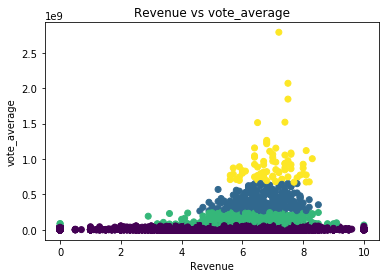

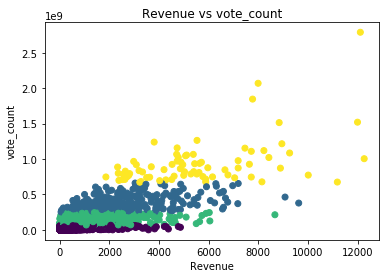

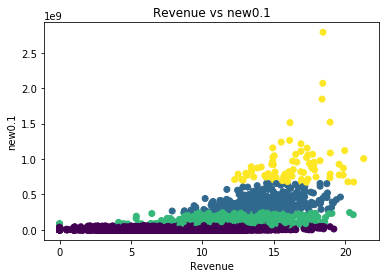

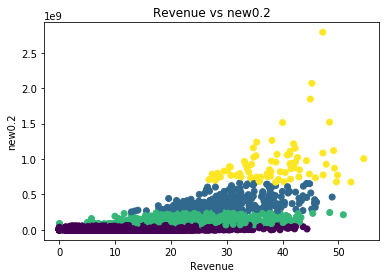

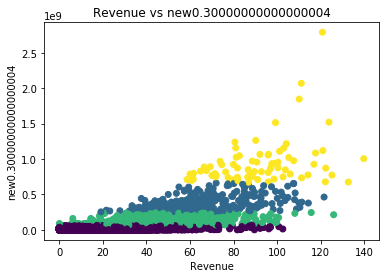

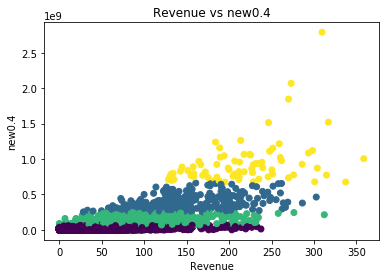

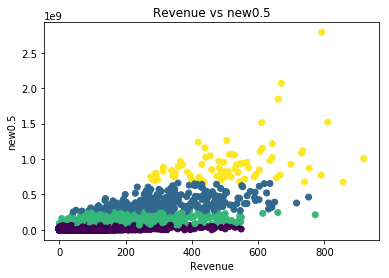

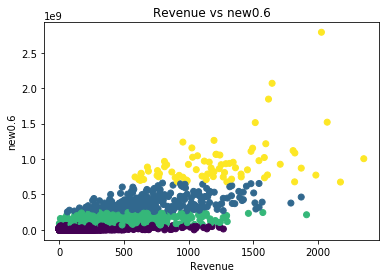

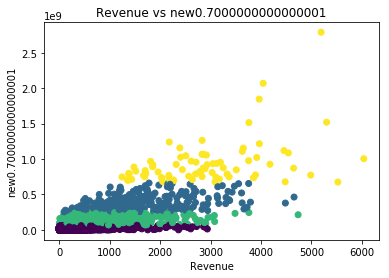

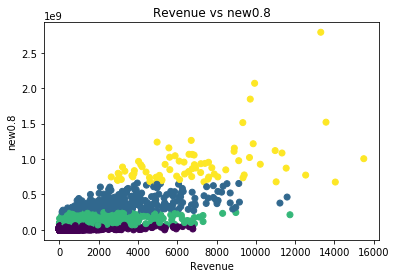

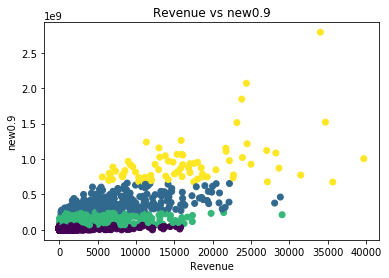

In [9]:
size_array = list(train.groupby(['cluster']).count()['revenue'].values)
train[train['cluster']==size_array.index(sorted(size_array)[0])].revenue.mean()
for i in train.iloc[:,:-1]:
    plt.scatter(train[i],train['revenue'],c=kmeans.labels_)
    plt.xlabel("Revenue")
    plt.ylabel(i)
    plt.title('Revenue vs '+i)
    plt.show()

In [10]:
cluster1 = train[train.cluster==0]
cluster1 = cluster1[cluster1.revenue!=0]
print('Size of cluster 1: ',len(cluster1))

Size of cluster 1:  31389


In [11]:
#we can observe clusters in the train and test dataset
test_clusters = kmeans.predict(test.revenue.values.reshape(-1,1))
test['cluster'] = test_clusters
print(train.groupby(['cluster']).mean())
print(test.groupby(['cluster']).mean())

               budget  popularity       revenue     runtime  vote_average  \
cluster                                                                     
0        5.436076e+06    2.463697  9.077832e+06   93.624837      5.605543   
1        9.215676e+07   16.518574  3.809150e+08  117.579125      6.583165   
2        4.347351e+07   10.959109  1.243770e+08  119.979822      6.325827   
3        1.621867e+08   50.661106  9.431160e+08  132.893333      6.982667   

          vote_count     new0.1     new0.2  new0.30000000000000004  \
cluster                                                              
0          46.697824   7.327419   9.835222               13.579166   
1        2504.171717  14.140495  30.540037               66.299506   
2         883.648103  11.848542  22.578831               43.653587   
3        5598.280000  16.451646  38.835947               91.851955   

             new0.4      new0.5       new0.6  new0.7000000000000001  \
cluster                                      

/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
meaan = []
meta.loc[:,'release_date']=pd.to_datetime(meta.release_date, format = '%Y-%m-%d', errors="coerce")
for i in range(1970,2018,5):
    mask = (meta['release_date'] >= str(i)+'-1-1') & (meta['release_date'] < str(i+5)+'-1-1')
    tdf = meta[mask]
    tdf = tdf.sort_values(['release_date'])
    dates = np.array([j for j in tdf.release_date])
    print(str(i)+" To "+str(i+5))
    print("Mean budget "+str(tdf.budget.mean()))

#Indicates an increase in budget over the years. Here every 5 years from 1970 onwards is taken. This is to show that the 
#inflation of the prices over the years need not be separately accounted using any factor as the budget itself is increasing
#across the years

1970 To 1975
Mean budget 3790018.0715419464
1975 To 1980
Mean budget 4934647.903049159
1980 To 1985
Mean budget 6160134.361463692
1985 To 1990
Mean budget 7003717.319942057
1990 To 1995
Mean budget 8767766.285978835
1995 To 2000
Mean budget 10801092.756497527
2000 To 2005
Mean budget 11292155.545526931
2005 To 2010
Mean budget 10043233.545322001
2010 To 2015
Mean budget 9318655.759730736
2015 To 2020
Mean budget 10074713.755130522


/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


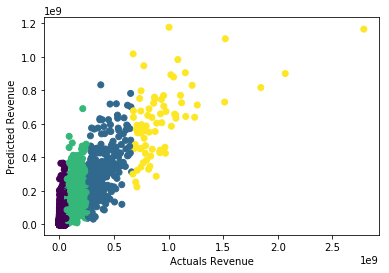

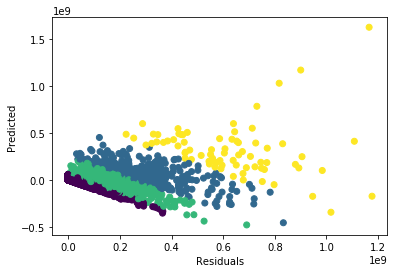

RMSE = 33500542.839698836
Comparison of factors for vote count vs r_squared value
0.100.605280
0.200.606763
0.300.615398
0.400.632832
0.500.656168
0.600.680621
0.700.702306
0.800.719350
0.900.731511


In [24]:
#Linear regression done on selected attributes
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
factors_dict = dict()
for factor in factors:
    X = train[['budget','popularity','new'+str(factor)]]
    release = meta[['release_date']]
    y = train[['revenue']]
    
    lm = linear_model.LinearRegression()
    model = lm.fit(X,y)
    predictions = lm.predict(X)
    pred = pd.DataFrame(predictions,columns=["revenue"])
    y['revenue_pred'] = predictions
    factors_dict[factor]=model.score(X,y.revenue)

residuals = y.revenue - y.revenue_pred
plt.scatter(y.revenue,y.revenue_pred,c=kmeans.labels_)
plt.xlabel("Actuals Revenue")
plt.ylabel("Predicted Revenue")
plt.show()
plt.scatter(y.revenue_pred,residuals,c=kmeans.labels_)
plt.xlabel("Residuals")
plt.ylabel("Predicted")
plt.show()
print("RMSE = "+str((mean_squared_error(y.revenue,y.revenue_pred))**0.5))
print("Comparison of factors for vote count vs r_squared value")
for key,val in factors_dict.items():
    print("{0:0.1f} : {1:.6f}".format(key,val))